# GMTの微調整

GMTは `gmt defaults` コマンドでさまざまな調整を行うことができます．PyGMTでも同じことを実現する`pygmt.config`があります．

しかし，（シェルスクリプトによる従来のGMTでもそうなのですが）うかつに設定を変えると，同じスクリプト（シェルの場合は同じディレクトリ）で作成する他の図にも意図せず影響を及ぼしてしまうことがあります．

そこで，PyGMTではPythonの`with`構文を用いる方法が提案されています．以下の例は全く同じ図を`config`だけを変えてプロットしたものです．

In [1]:
import pygmt

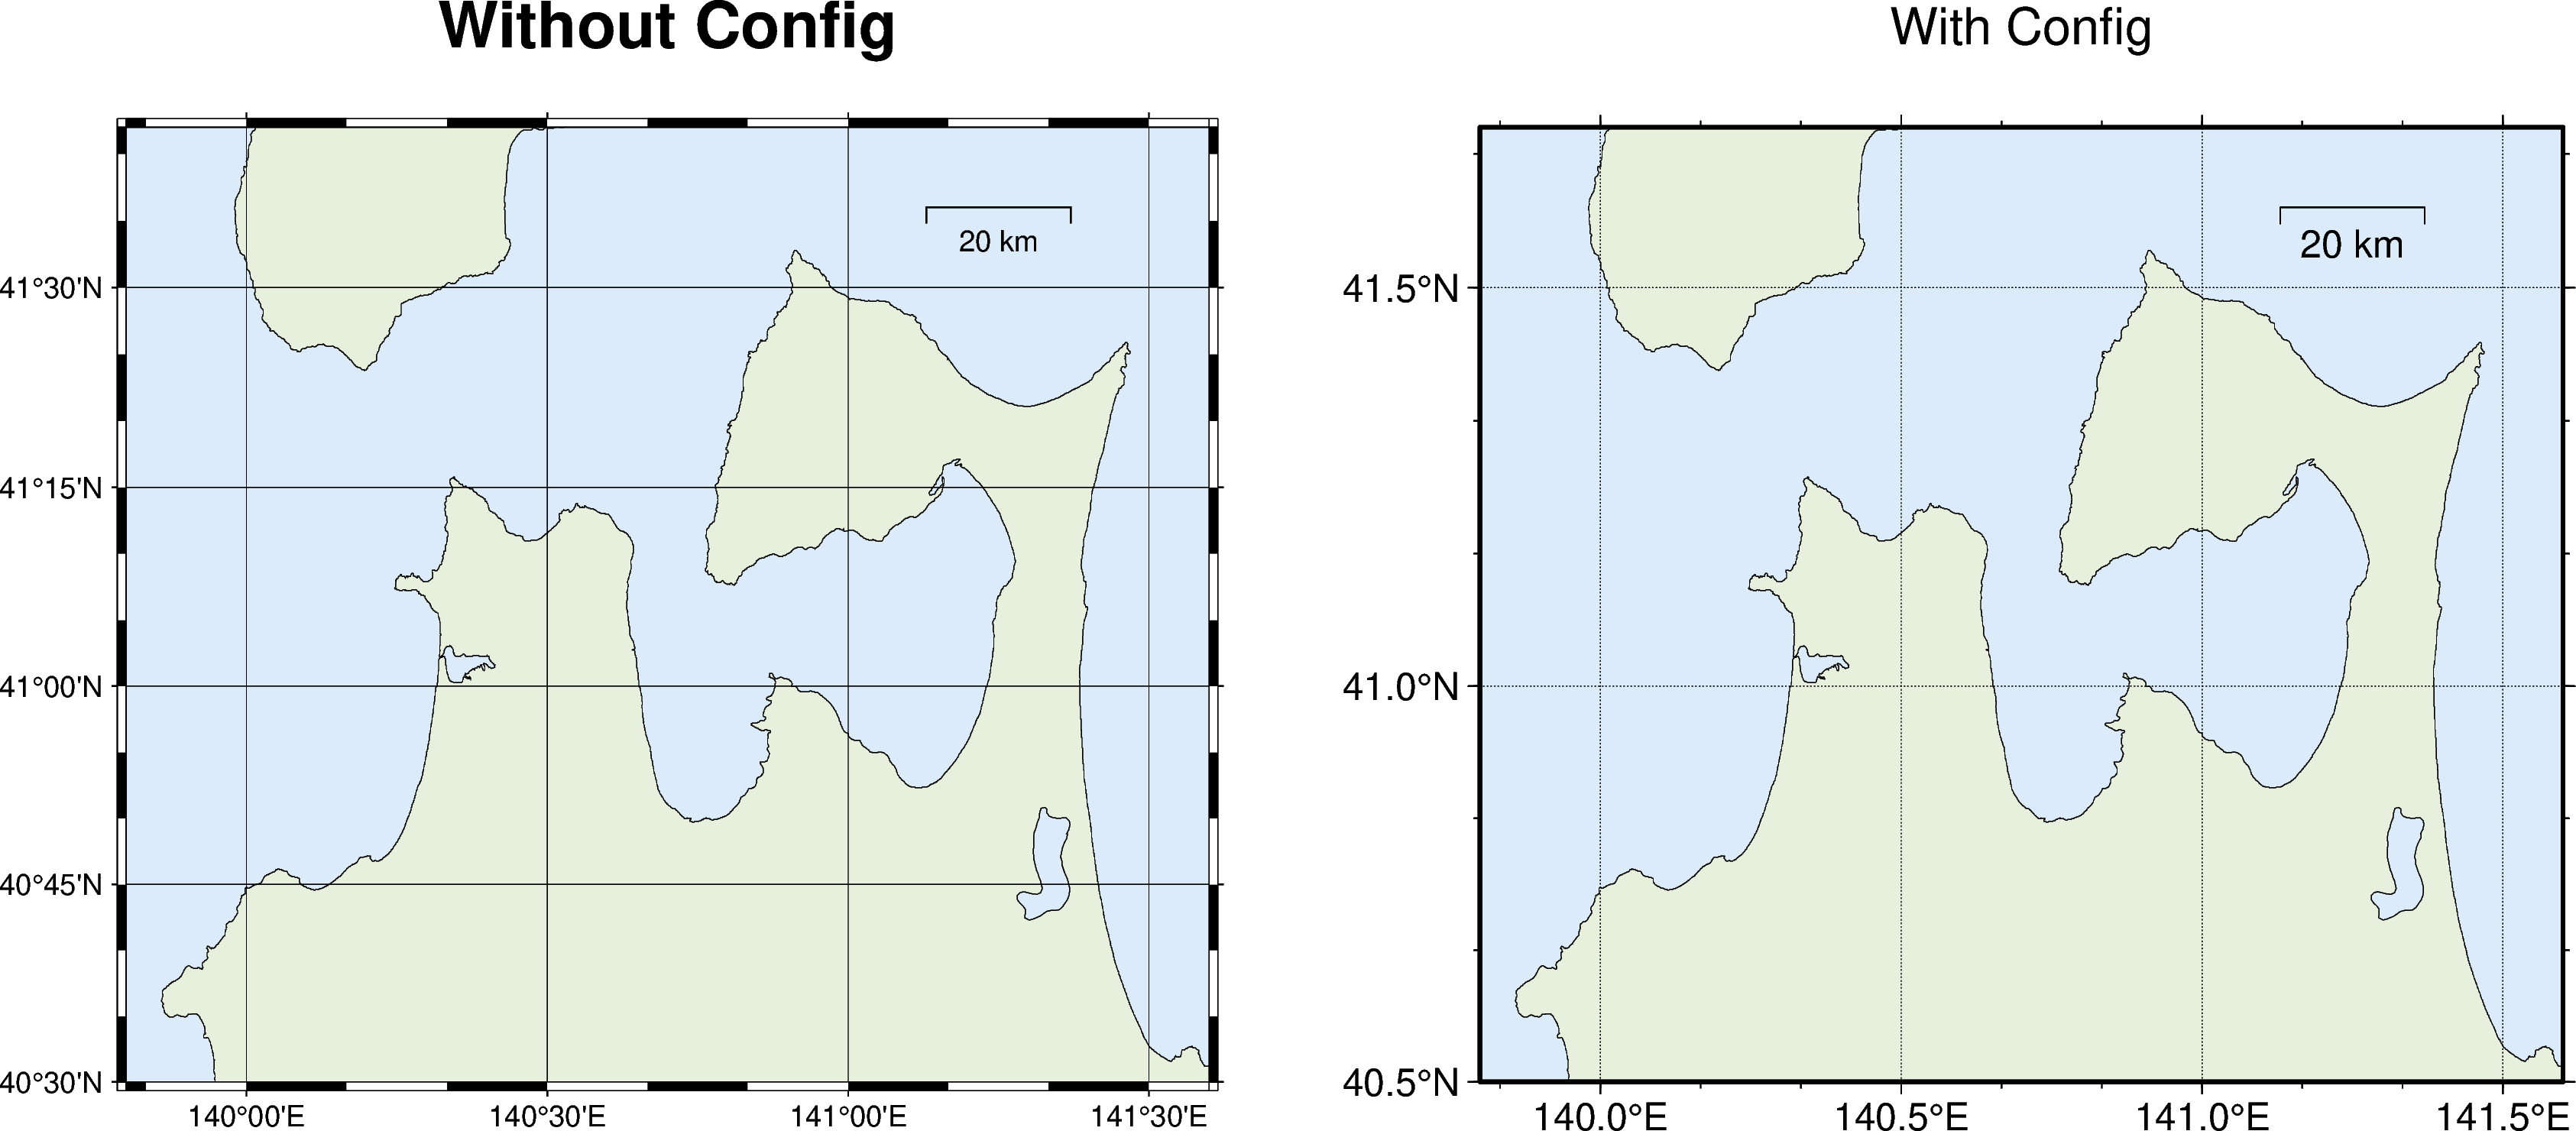

In [3]:
fig = pygmt.Figure()


fig.coast(
    projection  = 'M12c',                       
    region      =  (139.8, 141.6, 40.5, 41.7),  
    shorelines  = 'default,black',              
    area_thresh = 10,                           
    resolution  = 'f',                          
    land        = '230/240/220',                
    water       = '220/235/250',                
    map_scale   = '141.25/41.6/41.6/20',        
    frame       = ['WSen+tWithout Config', 'xafg', 'yafg']
)

fig.shift_origin(xshift = 15)

with pygmt.config(
    FONT_ANNOT_PRIMARY   = '12p,Helvetica,black',
    FONT_ANNOT_SECONDARY = '11p,Helvetica,black',
    FONT_LABEL           = '14p,Helvetica,black',
    FONT_TITLE           = '16p,Helvetica,black',
    MAP_GRID_PEN_PRIMARY = '0.25p,30/30/30,.',
    MAP_FRAME_TYPE       = 'plain',
    FORMAT_GEO_MAP       = 'DF',
    FORMAT_FLOAT_OUT     = '%.1f',
    PS_IMAGE_COMPRESS    = 'none',
    PS_LINE_CAP          = 'round',
    PS_LINE_JOIN         = 'round'
):

    fig.coast(
        projection  = 'M12c',                      
        region      = (139.8, 141.6, 40.5, 41.7),  
        shorelines  = 'default,black',             
        area_thresh = 10,                          
        resolution  = 'f',                         
        land        = '230/240/220',               
        water       = '220/235/250',               
        map_scale   = '141.25/41.6/41.6/20',       
        frame       = ['WSen+tWith Config', 'xafg', 'yafg']
    )


fig.show()

まったく同じ領域の地図を（タイトル以外）全く同じオプションでプロットしていますが，緯度経度の書式（時分秒か度か），それに伴い自動で設定されるラベルの間隔，フレームの種類，ラベルやタイトルのフォントやフォントサイズなどが異なっていることがわかるでしょう．

```{warning}
上記の地図のプロット順を逆にする（`with`でオプションありを先に描画）実験をしてみたところ，
ほとんどはうまく行くのですが，グリッド線の線種（点線）だけは`config`なしの図にも反映されてしまいました．
もしかしたらこれはバグかもしれません．
```